In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


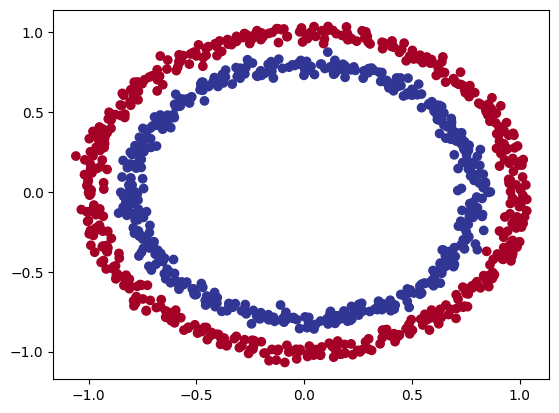

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y,cmap=plt.cm.RdYlBu);

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(x), len(y)

(1000, 1000)

In [8]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
import tensorflow as tf


tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.2189 - accuracy: 0.5160
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


In [10]:
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [11]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(x, y, epochs=100, verbose=0)

In [12]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932860016822815, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4980


[0.693661093711853, 0.49799999594688416]

In [16]:
import numpy as np

def plot_decision_boundary(model, x, y):

  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

  xx, yy=np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification")

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")

    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,  alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classification


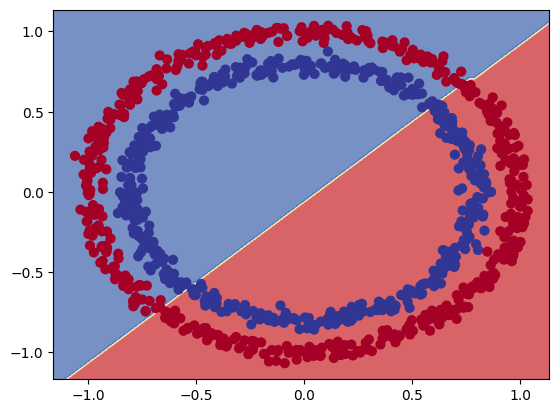

In [17]:
plot_decision_boundary(model_3, x, y)

In [18]:
tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 546.6910 - mae: 546.6910
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 395.8245 - mae: 395.8245
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 251.8385 - mae: 251.8385
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 103.3616 - mae: 103.3616
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 70.7960 - mae: 70.7960
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 104.6127 - mae: 104.6127
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 72.5025 - mae: 72.5025
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 46.6201 - mae: 46.6201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 49.4513 - mae: 49.4513
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 43.3566 - mae: 43.3566
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 6ms/step


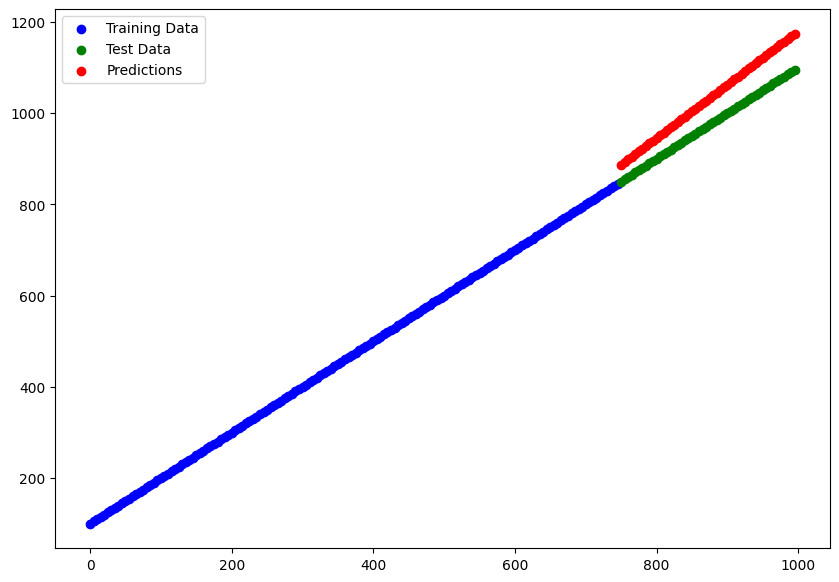

In [20]:
y_reg_preds = model_3.predict(x_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(x_reg_test, y_reg_test, c="g", label = "Test Data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [21]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2207 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2158 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2056 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2029 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2010 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1997 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1983 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1974 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1968 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.1957 - accuracy: 0.4870
Epoch 11/

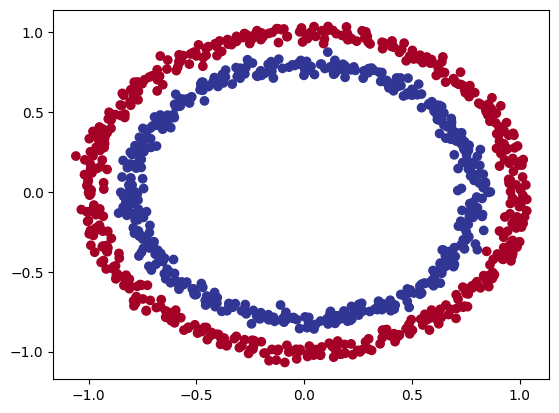

In [22]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


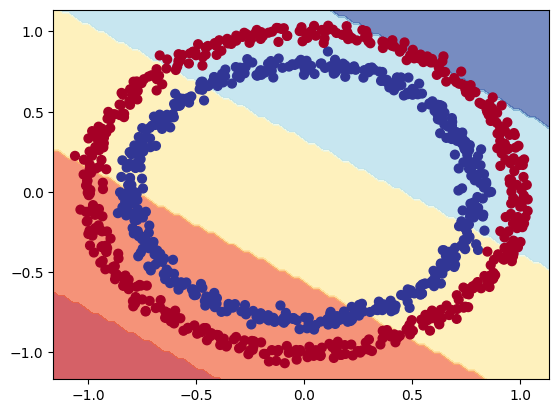

In [23]:
plot_decision_boundary(model=model_4, x=x, y=y)

In [24]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9100 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8943 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8826 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8439 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8412 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8228 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.8183 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8054 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7732 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7789 - accuracy: 0.4850
Epoch 11/

In [25]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.8956 - accuracy: 0.2930
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5720 - accuracy: 0.2860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3441 - accuracy: 0.3300
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1720 - accuracy: 0.3260
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9827 - accuracy: 0.3240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7543 - accuracy: 0.3360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6036 - accuracy: 0.3380
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4802 - accuracy: 0.3390
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3578 - accuracy: 0.3310
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.1986 - accuracy: 0.3310
Epoch 11/

In [26]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7944 - accuracy: 0.1720


[0.7943609952926636, 0.1720000058412552]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


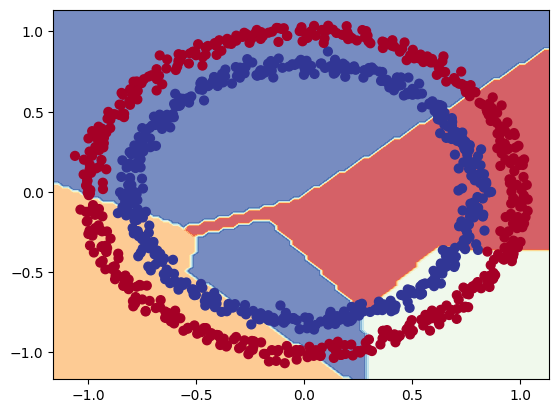

In [27]:
plot_decision_boundary(model_6,x,y)

In [28]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5070
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5090
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5110
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5160
Epoch 11/

In [29]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9990


[0.15321379899978638, 0.9990000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classification


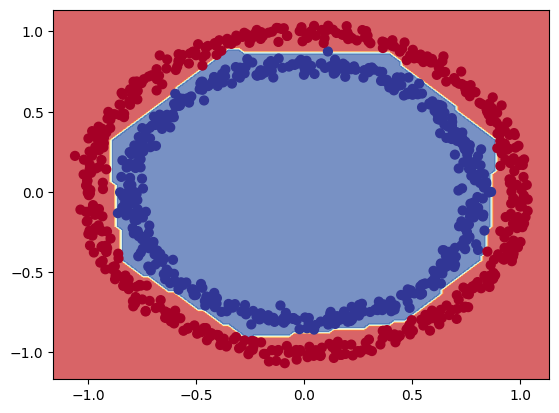

In [30]:
plot_decision_boundary(model_7, x, y)

In [31]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

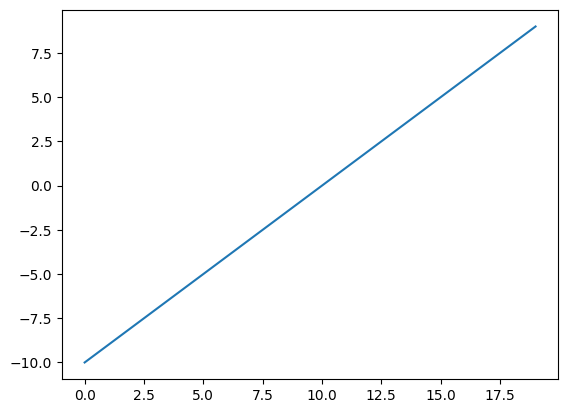

In [32]:
plt.plot(A)

In [33]:
def sigmoid(x):
  return 1 / (1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

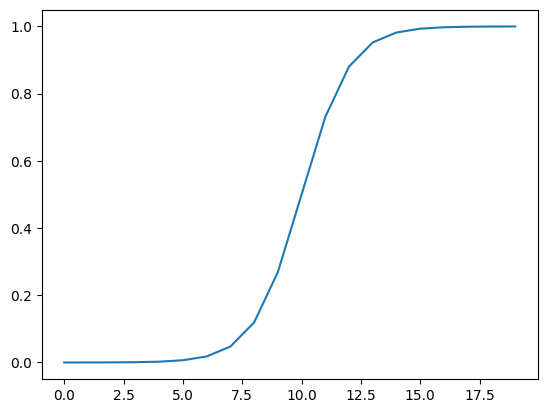

In [34]:
plt.plot(sigmoid(A))

In [35]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

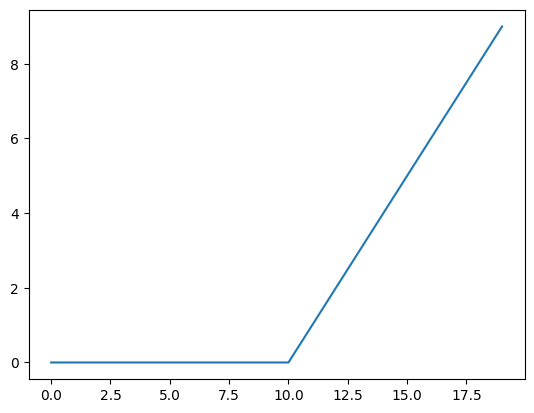

In [36]:
plt.plot(relu(A))

In [37]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

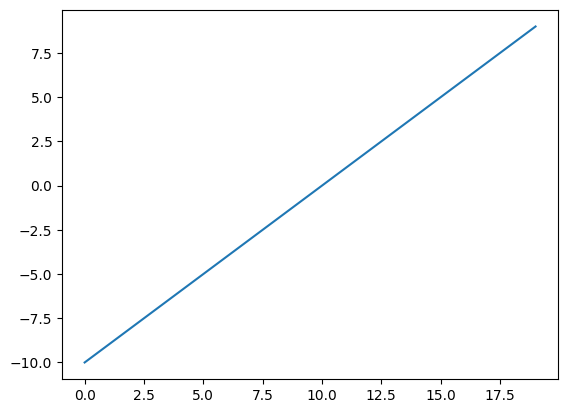

In [38]:
plt.plot(tf.keras.activations.linear(A))

In [39]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [40]:
len(x)

1000

In [41]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6939 - accuracy: 0.4762
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5213
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6175
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6325
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.5850
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.7362
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7275
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8037
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.8475
Epoch 11/25
25/25 [

In [43]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9800


[0.08456262946128845, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


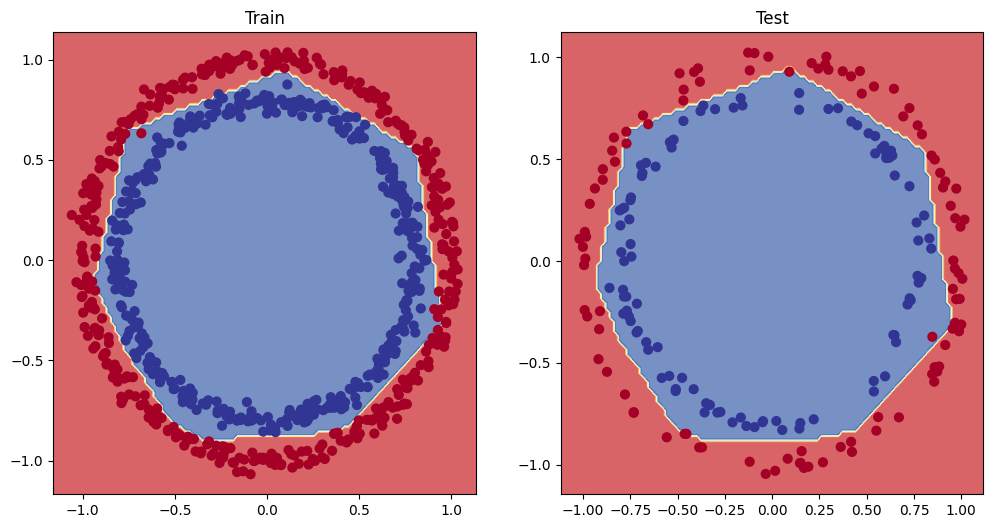

In [44]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, x_test, y_test)
plt.show()

In [45]:
history.history

{'loss': [0.6938628554344177,
  0.690986692905426,
  0.6871622204780579,
  0.6786420345306396,
  0.6669110059738159,
  0.6501761674880981,
  0.6238719820976257,
  0.590523898601532,
  0.5367547869682312,
  0.4837639331817627,
  0.4300742447376251,
  0.3770334720611572,
  0.3214363157749176,
  0.2753600776195526,
  0.22628960013389587,
  0.19281494617462158,
  0.16706618666648865,
  0.1491265892982483,
  0.1304161548614502,
  0.12057852745056152,
  0.10543970763683319,
  0.09734582155942917,
  0.08994953334331512,
  0.08443199098110199,
  0.07722588628530502],
 'accuracy': [0.4762499928474426,
  0.5,
  0.5212500095367432,
  0.6175000071525574,
  0.6324999928474426,
  0.5849999785423279,
  0.7362499833106995,
  0.7275000214576721,
  0.8037499785423279,
  0.8475000262260437,
  0.8837500214576721,
  0.9237499833106995,
  0.9449999928474426,
  0.96875,
  0.9787499904632568,
  0.9887499809265137,
  0.9837499856948853,
  0.987500011920929,
  0.9937499761581421,
  0.9887499809265137,
  0.99250

In [46]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693863,0.47625
1,0.690987,0.50000
2,0.687162,0.52125
3,0.678642,0.61750
4,0.666911,0.63250
5,0.650176,0.58500
6,0.623872,0.73625
7,0.590524,0.72750
8,0.536755,0.80375
9,0.483764,0.84750


Text(0.5, 1.0, 'Model_8 loss curves')

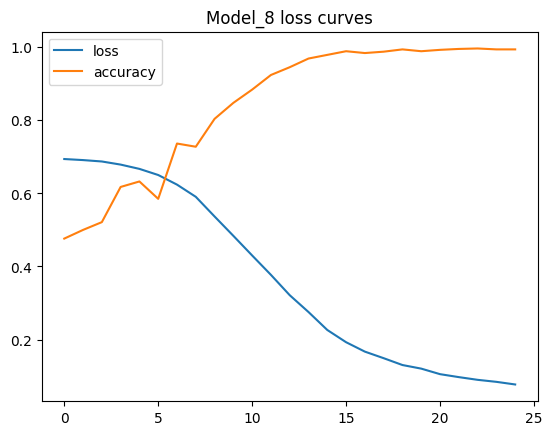

In [47]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

In [48]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_9 = model_9.fit(x_train, y_train, epochs=100, callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6985 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4925 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.4913 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

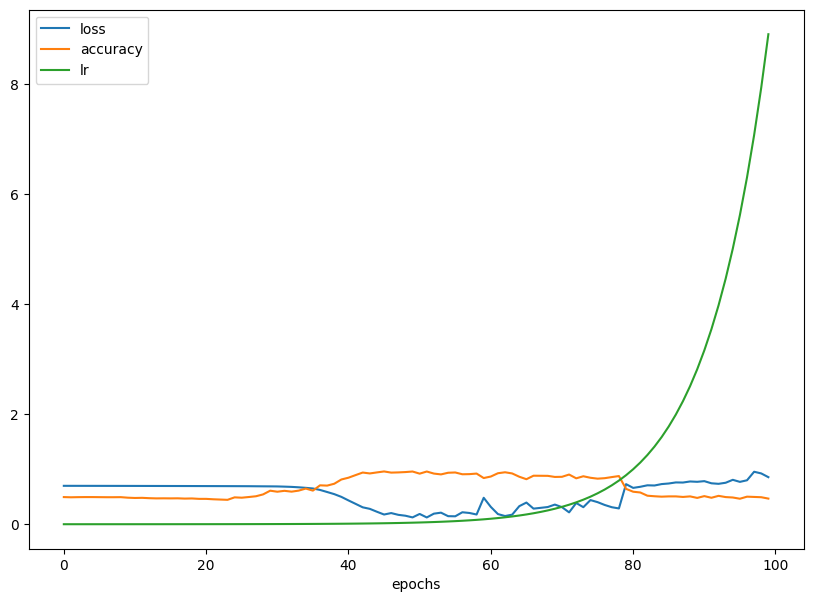

In [49]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

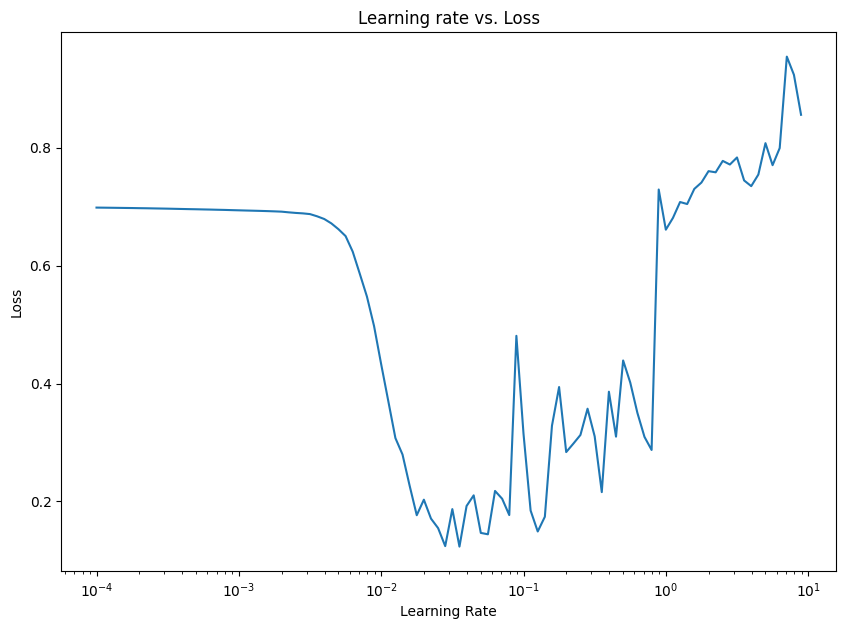

In [50]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [51]:
len(lrs)

100

In [52]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5425
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.5962
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6513
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6120 - accuracy: 0.6500
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.6775
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.6938
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7212
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7350
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7650
Epoch 11/20
25/25 [

In [53]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9950


[0.14938856661319733, 0.9950000047683716]

In [54]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9800


[0.08456262946128845, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


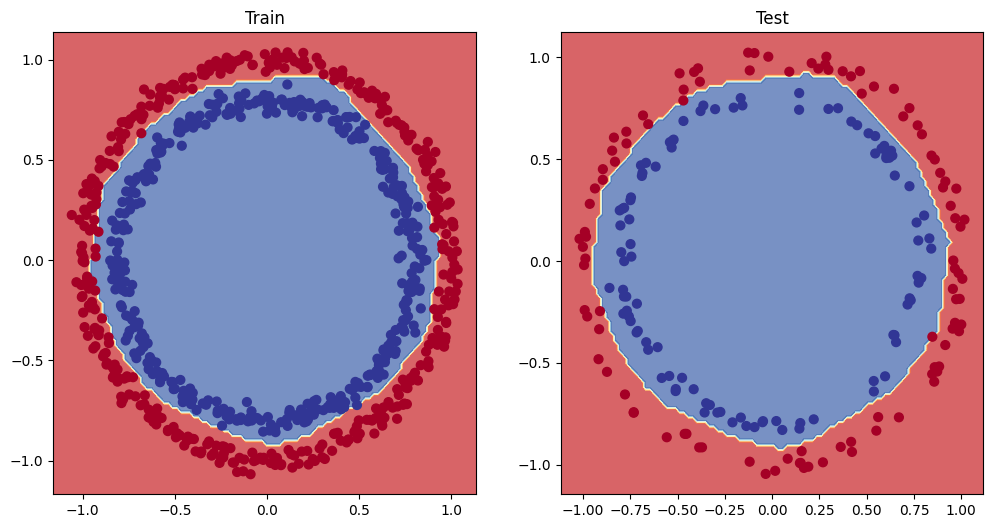

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show()

In [56]:
loss, accuracy = model_10.evaluate(x_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9950
Model loss on the test set: 0.14938856661319733
Model accuracy on the test set: 99.50%


In [57]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[100,   1],
       [  0,  99]])

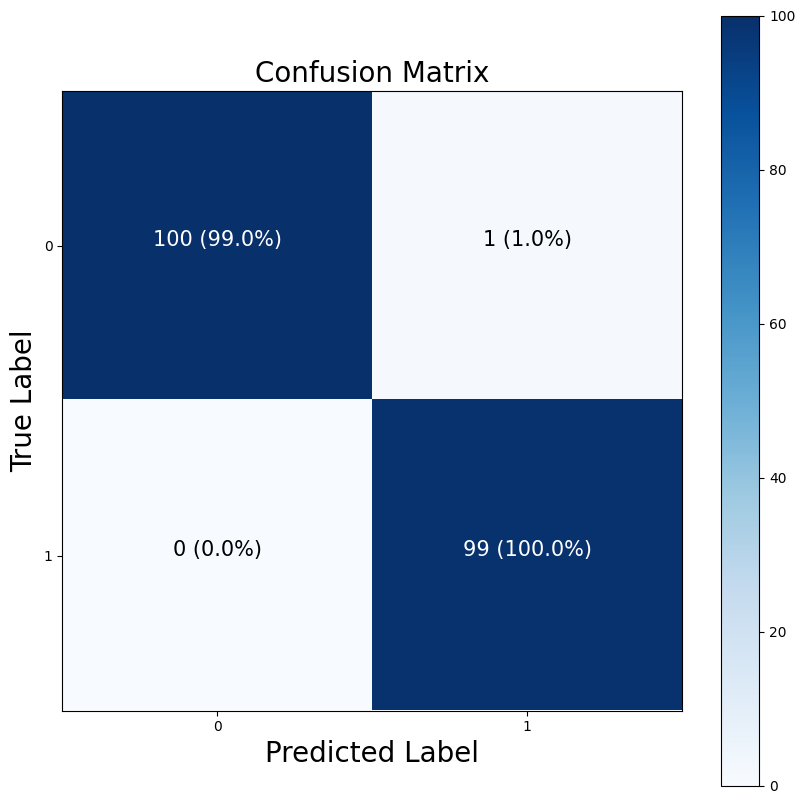

In [58]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)

fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j]> threshold else "black",
           size = 15)

In [59]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [60]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [61]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

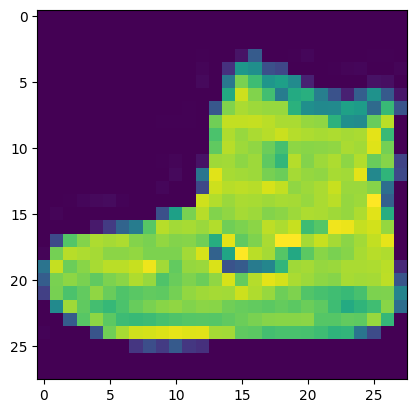

In [62]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [63]:
train_labels[0]

9

In [64]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

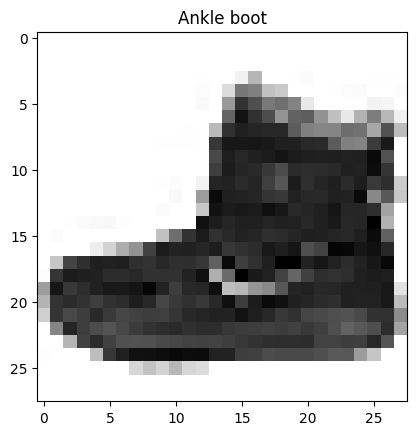

In [65]:
index_of_choice = 0
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

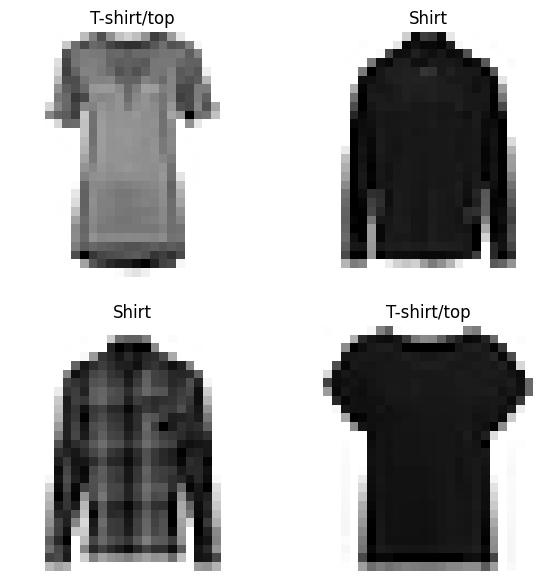

In [66]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [67]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4345 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0380 - accuracy: 0.1773 - val_loss: 1.7880 - val_accuracy: 0.2303
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7219 - accuracy: 0.2644 - val_loss: 1.6419 - val_accuracy: 0.3000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6102 - accuracy: 0.3073 - val_loss: 1.5907 - val_accuracy: 0.3303
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5679 - accuracy: 0.3123 - val_loss: 1.5556 - val_accuracy: 0.3396
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5456 - accuracy: 0.3147 - val_loss: 1.5375 - val_accuracy:

In [68]:
train_data.min(), train_data.max()

(0, 255)

In [69]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [70]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2435 - accuracy: 0.5218 - val_loss: 0.8381 - val_accuracy: 0.6908
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7458 - accuracy: 0.7251 - val_loss: 0.7179 - val_accuracy: 0.7371
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6648 - accuracy: 0.7518 - val_loss: 0.6865 - val_accuracy: 0.7448
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6325 - accuracy: 0.7625 - val_loss: 0.6453 - val_accuracy: 0.7629
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6145 - accuracy: 0.7680 - val_loss: 0.6323 - val_accuracy: 0.7666
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5980 - accuracy: 0.7774 - val_loss: 0.6317 - val_accuracy: 0.7713
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5865 - accuracy: 0.7862 - val_loss: 0.6149 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

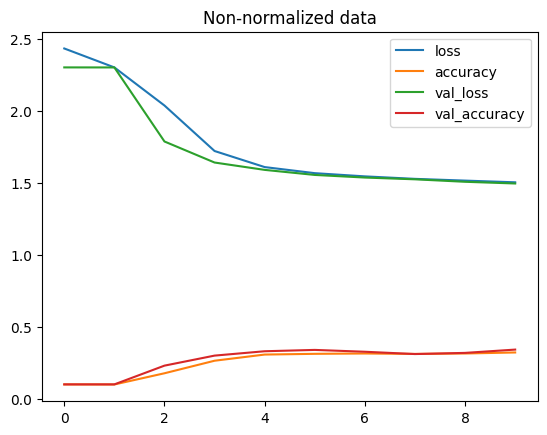

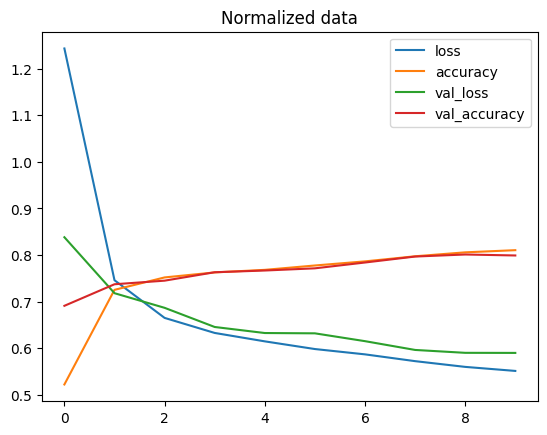

In [71]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [72]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0595 - accuracy: 0.6014 - val_loss: 0.7915 - val_accuracy: 0.7108 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6989 - accuracy: 0.7417 - val_loss: 0.6912 - val_accuracy: 0.7550 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6180 - accuracy: 0.7787 - val_loss: 0.6527 - val_accuracy: 0.7624 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5811 - accuracy: 0.7975 - val_loss: 0.6041 - val_accuracy: 0.7908 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5657 - accuracy: 0.8035 - val_loss: 0.6227 - val_accuracy: 0.7826 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5527 - accuracy: 0.8070 - val_loss: 0.6249 - val_accuracy: 0.7794 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

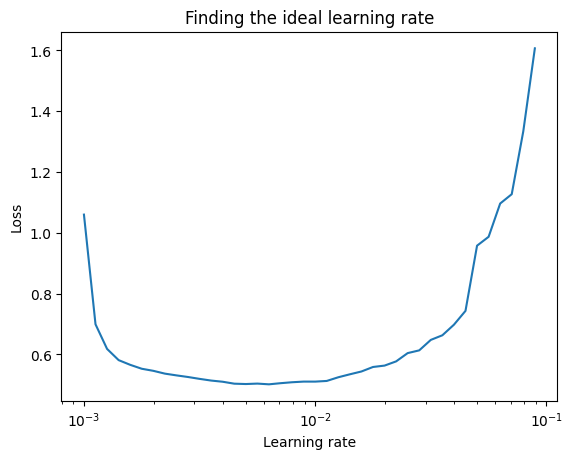

In [73]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [74]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6074 - accuracy: 0.3705 - val_loss: 1.3135 - val_accuracy: 0.4355
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1813 - accuracy: 0.5413 - val_loss: 1.0874 - val_accuracy: 0.5855
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0015 - accuracy: 0.6094 - val_loss: 0.9660 - val_accuracy: 0.6352
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8889 - accuracy: 0.6468 - val_loss: 0.8741 - val_accuracy: 0.6524
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8184 - accuracy: 0.6646 - val_loss: 0.8260 - val_accuracy: 0.6693
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7926 - accuracy: 0.6733 - val_loss: 0.8339 - val_accuracy: 0.6665
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7774 - accuracy: 0.6800 - val_loss: 0.8094 - val_accuracy:

In [92]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size= 15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  treshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size = text_size)

In [93]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [94]:
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.9183223e-12, 5.5095648e-09, 1.4564861e-15, 1.8556635e-05,
        1.1440838e-11, 1.7300464e-01, 1.2357049e-12, 1.3420466e-01,
        2.0745178e-05, 6.9275153e-01],
       [2.6468994e-02, 3.7388869e-05, 4.5295539e-01, 2.7978171e-03,
        2.7505937e-01, 1.5559438e-06, 2.4100545e-01, 5.3174375e-12,
        1.6740477e-03, 5.1021680e-11],
       [5.6393594e-03, 9.9408513e-01, 1.0682690e-11, 2.7392912e-04,
        9.1597068e-12, 1.8680362e-17, 1.3846313e-06, 0.0000000e+00,
        3.4497694e-30, 0.0000000e+00],
       [7.2980009e-04, 9.9835122e-01, 5.4876291e-13, 9.1889652e-04,
        2.5474486e-12, 3.2327768e-15, 1.5991114e-07, 2.3586107e-36,
        1.5194510e-28, 0.0000000e+00],
       [8.1302814e-02, 2.9563924e-04, 3.0274987e-01, 1.1509361e-02,
        2.2414862e-01, 2.3324744e-06, 3.7976477e-01, 9.9184604e-13,
        2.2649663e-04, 7.8146490e-13]], dtype=float32)

In [95]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.9183223e-12, 5.5095648e-09, 1.4564861e-15, 1.8556635e-05,
        1.1440838e-11, 1.7300464e-01, 1.2357049e-12, 1.3420466e-01,
        2.0745178e-05, 6.9275153e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [96]:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 2, 4, 5, 7])

In [97]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[813,   3,  25,  50,  23,   0,  75,   0,  11,   0],
       [ 17, 926,   5,  37,   5,   0,   9,   0,   1,   0],
       [ 17,   0, 816,  11, 106,   0,  44,   0,   6,   0],
       [ 35,   9,  13, 819,  88,   0,  29,   0,   7,   0],
       [  1,   0, 525,  28, 398,   0,  18,   0,  30,   0],
       [  0,   0,   0,  14,   0, 864,   0,  61,  11,  50],
       [167,   0, 481,  41, 152,   0, 136,   0,  23,   0],
       [  0,   0,   0,   0,   0,  38,   0, 917,   2,  43],
       [  1,   0,   6,  12,  36,   1,   5,   3, 934,   2],
       [  0,   0,   0,   0,   0,  22,   0,  40,   6, 932]])

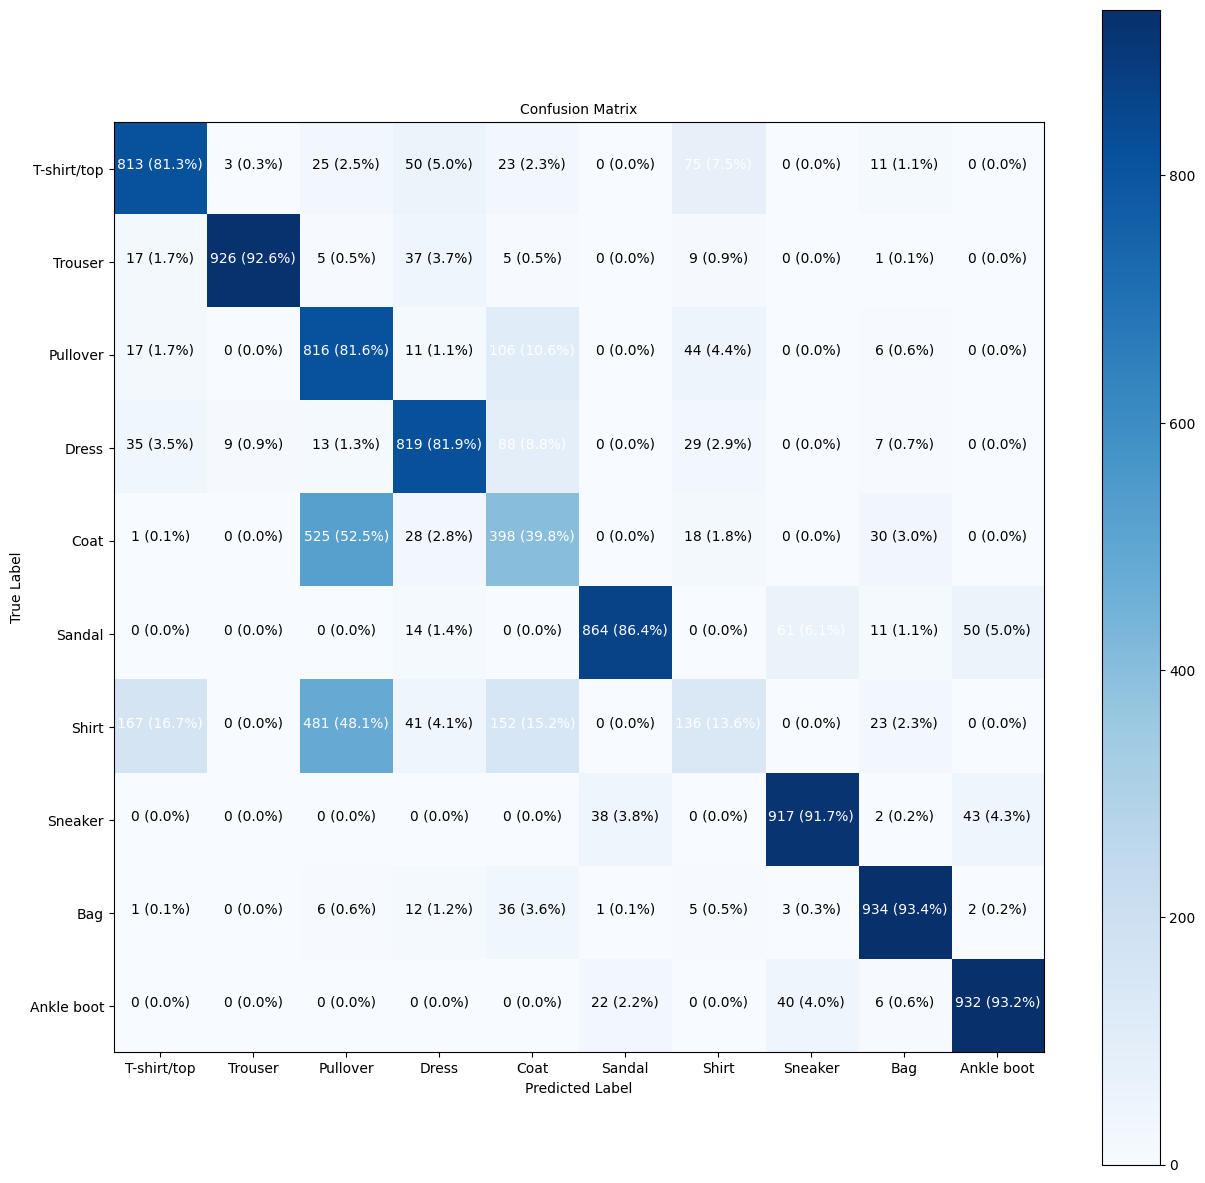

In [101]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [102]:
import random

def plot_random_image(model, images, true_labels, classes):
  i=random.randint(0, len(images))

  target_image = images[i]

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 37ms/step


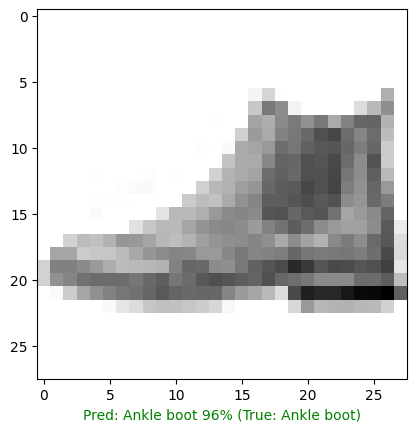

In [109]:
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [110]:
model_14.layers

In [111]:
model_14.layers[1]

In [114]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.41429603,  0.33787802, -0.03128045, -0.42781022],
        [ 1.0827203 ,  0.898471  , -0.05953368, -0.35147148],
        [-0.1453297 ,  0.13674028, -0.1530991 , -0.18904309],
        ...,
        [ 0.19228972,  0.47206903,  0.04283005, -0.7141954 ],
        [ 0.1427685 ,  0.55463177, -0.05901844, -0.41424215],
        [ 1.0621561 , -0.2231851 , -0.523681  ,  0.02185165]],
       dtype=float32),
 (784, 4))

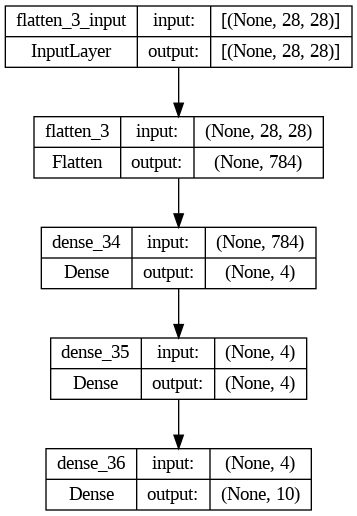

In [115]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)